### 10.11 
美国 Johnson & Johnson 公司于 1960～1980 年间每股收益的季度数据见于文件 JJ 中.

In [1]:
library(TSA)
data(JJ)

Warning message:
"package 'TSA' was built under R version 4.3.3"

Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




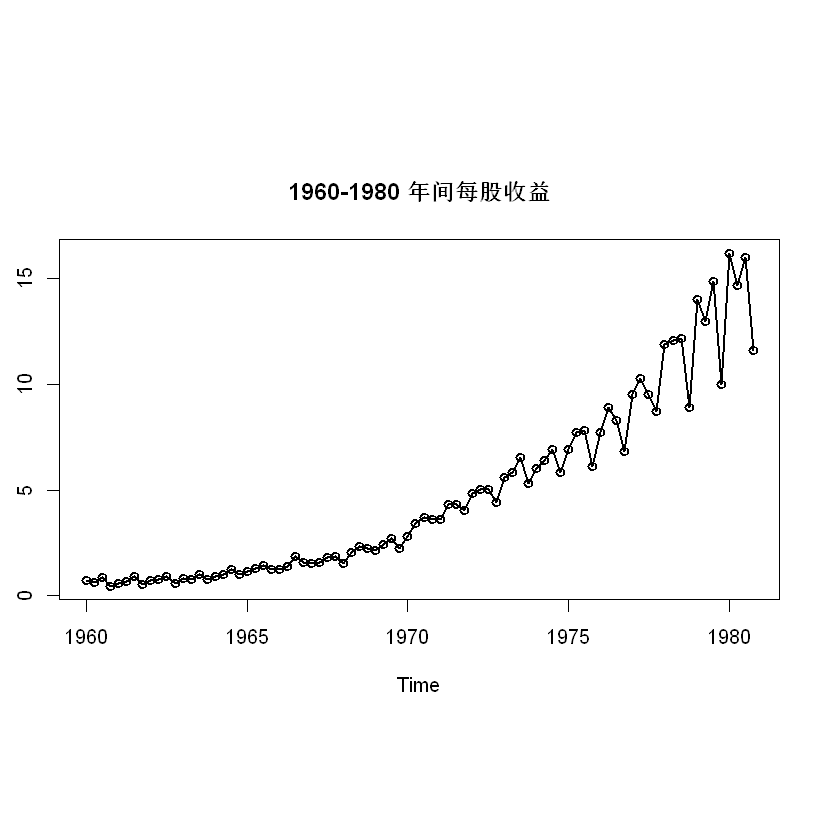

In [2]:
par(pin=c(6,3))
plot(JJ, type='o', pch=1, lwd=2, main='1960-1980 年间每股收益')

#### (a) 
画出该序列及其取对数后的时间序列图。论证对序列进行对数变换的必要性。  

$\text{Solution.}$

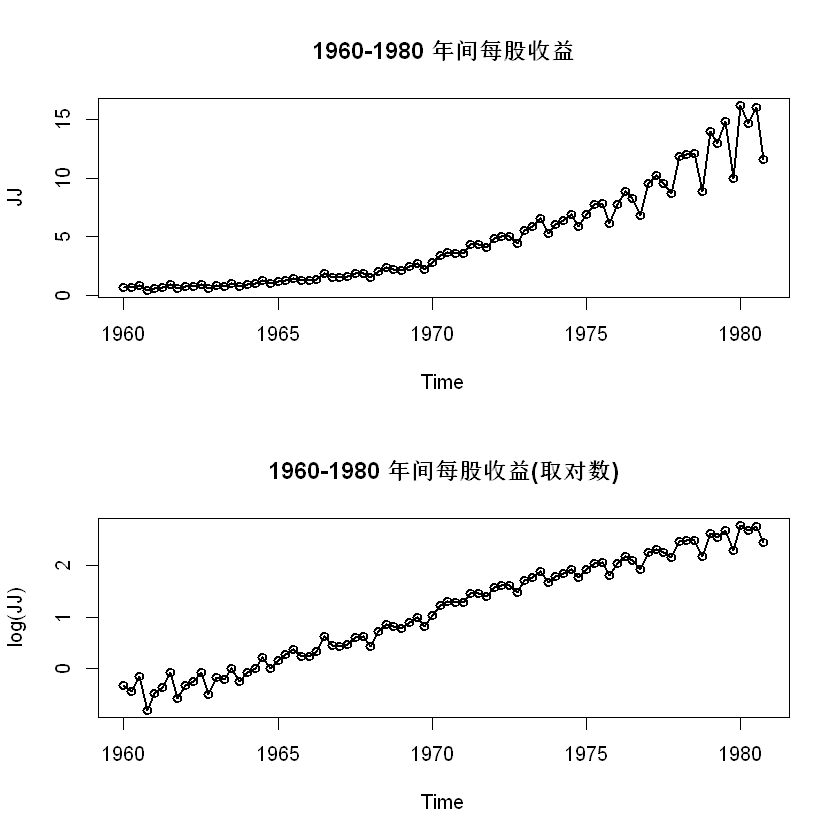

In [3]:
par(mfrow=c(2,1))
plot(JJ, type='o', pch=1, lwd=2, main='1960-1980 年间每股收益')
plot(log(JJ), type='o', pch=1, lwd=2, main='1960-1980 年间每股收益(取对数)')

很明显，取对数之后，序列的增量趋势更加“稳定”。  

#### (b) 
序列明显是非平稳的。对其进行一次差分变换并画出序列图。现在序列平稳性有无合理性？  

$\text{Solution.}$

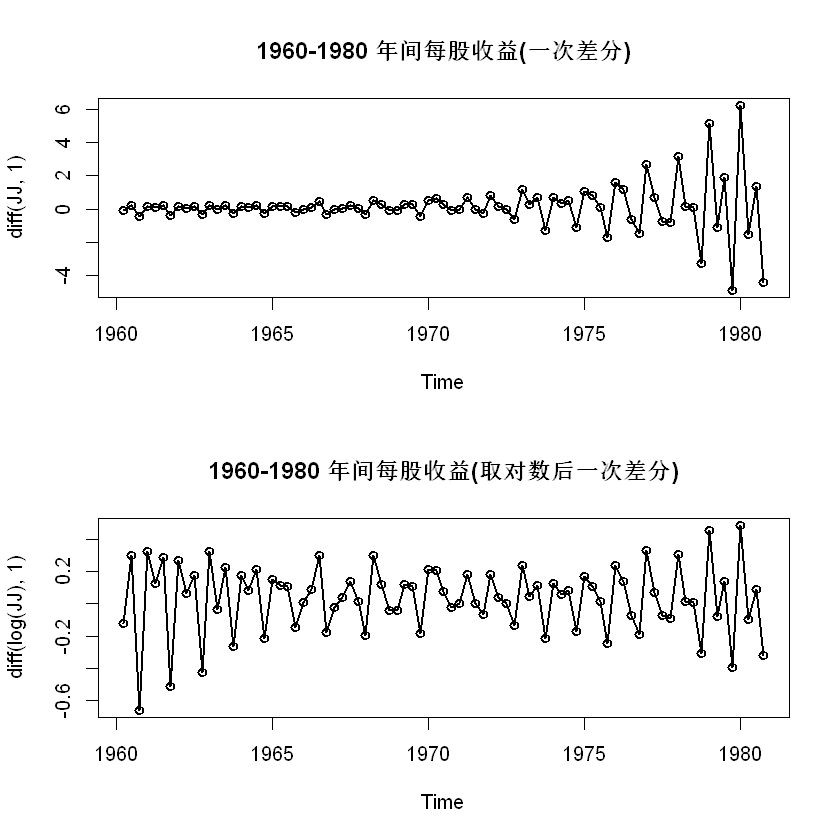

In [4]:
par(mfrow = c(2,1))
plot(diff(JJ,1), type='o', pch=1, lwd=2, main='1960-1980 年间每股收益(一次差分)')
plot(diff(log(JJ),1), type='o', pch=1, lwd=2, main='1960-1980 年间每股收益(取对数后一次差分)')

未作对数处理时，差分序列的非平稳性是明显的。  

而作对数处理后，差分序列似乎相对平稳了一点，但是目测仍有些可疑。

#### (c) 
计算并画出经一次差分后序列的样本 ACF，并解释结果。  

$\text{Solution.}$

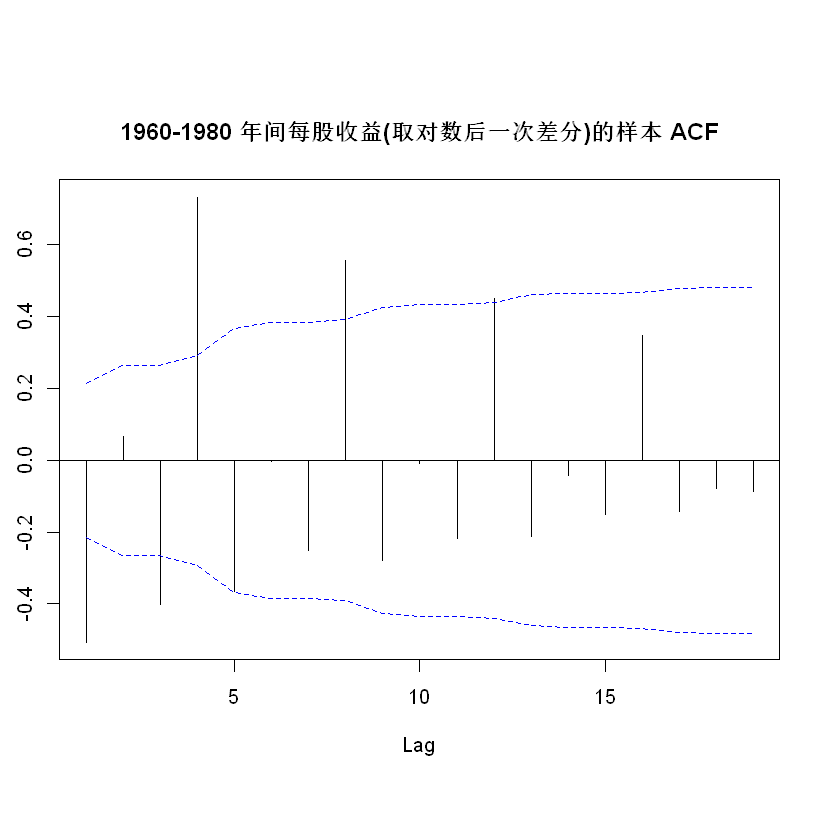

In [5]:
par(pin=c(6,4))
acf(diff(as.vector(log(JJ)),1), ci.type='ma', 
    main='1960-1980 年间每股收益(取对数后一次差分)的样本 ACF')

在 4, 8, 12, 16 这几个时间点上，我们捕捉到了明显的自相关性。  

据此有理由怀疑，这个序列可能是一个季节性 ARIMA 模型，其季节周期长度可能为4。

#### (d) 
画出并解释经过一次差分和季节差分后的序列图。牢记季度数据一季的长度为4。  

$\text{Solution.}$

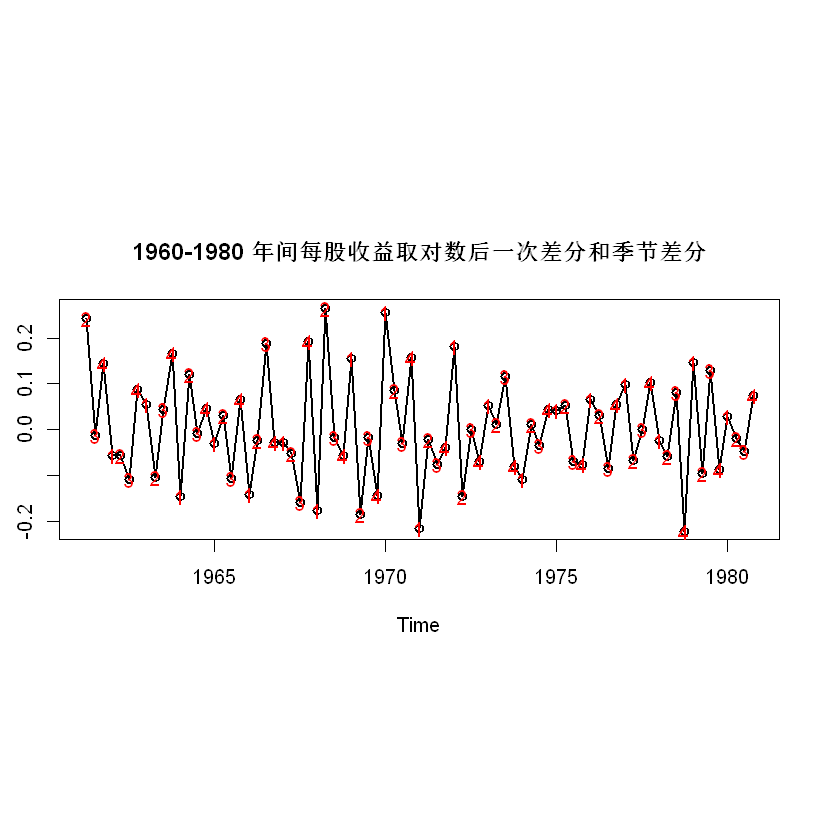

In [6]:
par(pin=c(6,2))

plot(diff(diff(log(JJ),4),1), type='o', pch=1, lwd=2, 
     main='1960-1980 年间每股收益取对数后一次差分和季节差分') 
points(y=diff(diff(log(JJ),4),1), 
       x=time(diff(diff(log(JJ),4),1)), 
       pch=as.vector(season(diff(diff(log(JJ),4),1))), 
       col='red')

现在看来，经过季节差分和一次差分后的序列（相对于各期时间点）的分布已经较为随机，没有明显的模式。

#### (e) 
画出并说明经过一次差分和季节差分后的序列的样本 ACF。  

$\text{Solution.}$

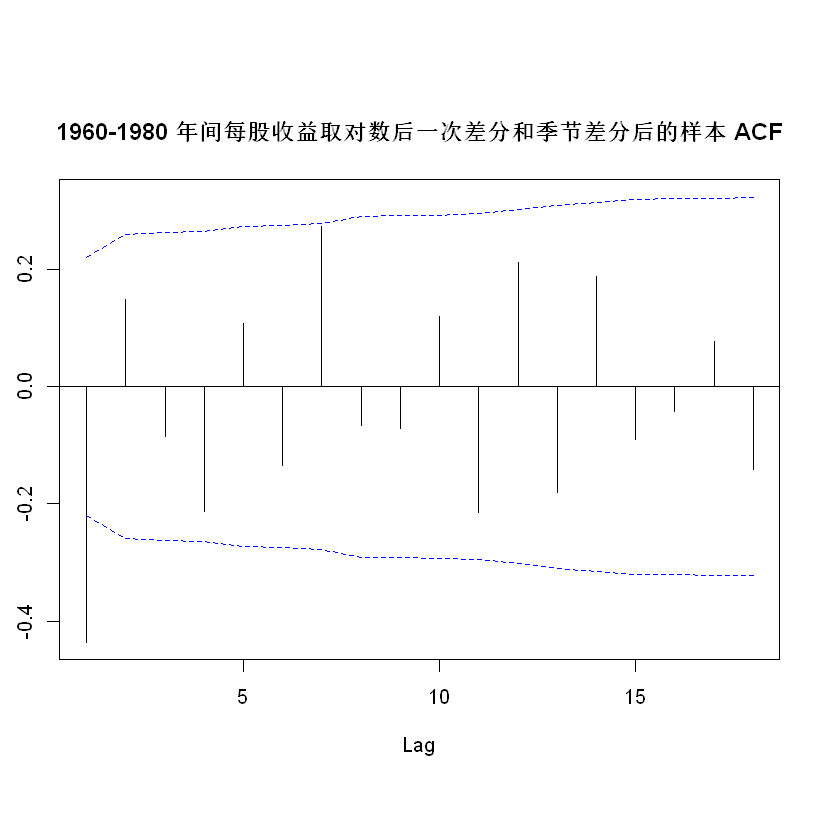

In [7]:
par(pin=c(6,4))
acf(as.vector( diff(diff(log(JJ),4),1) ), ci.type='ma', 
    main='1960-1980 年间每股收益取对数后一次差分和季节差分后的样本 ACF')

在第1期出现显著自相关。其余时间点，仅有第7期较为接近置信边界，其余均不显著。  

忽略这个，我们可以认为之前的差分操作是合理的。据此将模型识别为 $\text{ARIMA}(0, 1, 1)×(0, 1, 1)_4$

#### (f) 
拟合 $\text{ARIMA}(0, 1, 1)×(0, 1, 1)_4$ 模型，并评估系数估计值的显著性。  

$\text{Solution.}$

In [8]:
model = arima(log(JJ), 
              order=c(0,1,1), 
              seasonal=list(order=c(0,1,1), period=4)
              )

model


Call:
arima(x = log(JJ), order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 4))

Coefficients:
          ma1     sma1
      -0.6809  -0.3146
s.e.   0.0982   0.1070

sigma^2 estimated as 0.007931:  log likelihood = 78.38,  aic = -152.75

据此，模型拟合为 $\text{ARIMA}(0, 1, 1)×(0, 1, 1)_4$。系数估计均显著。

#### (g) 
对残差进行所有的诊断性检验。  

$\text{Solution.}$

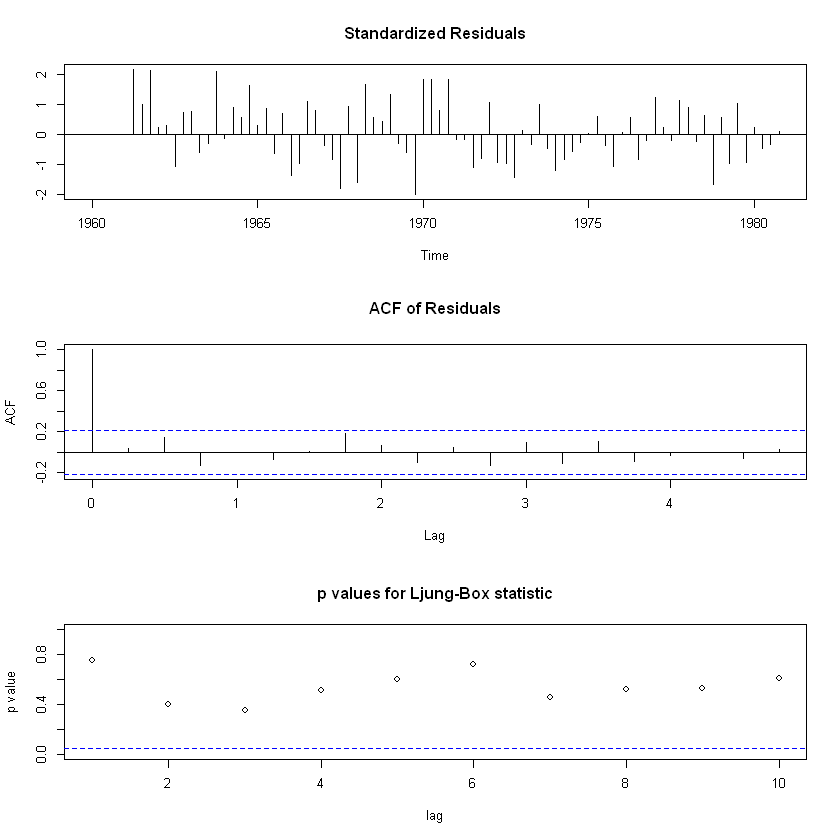

In [9]:
tsdiag(model)

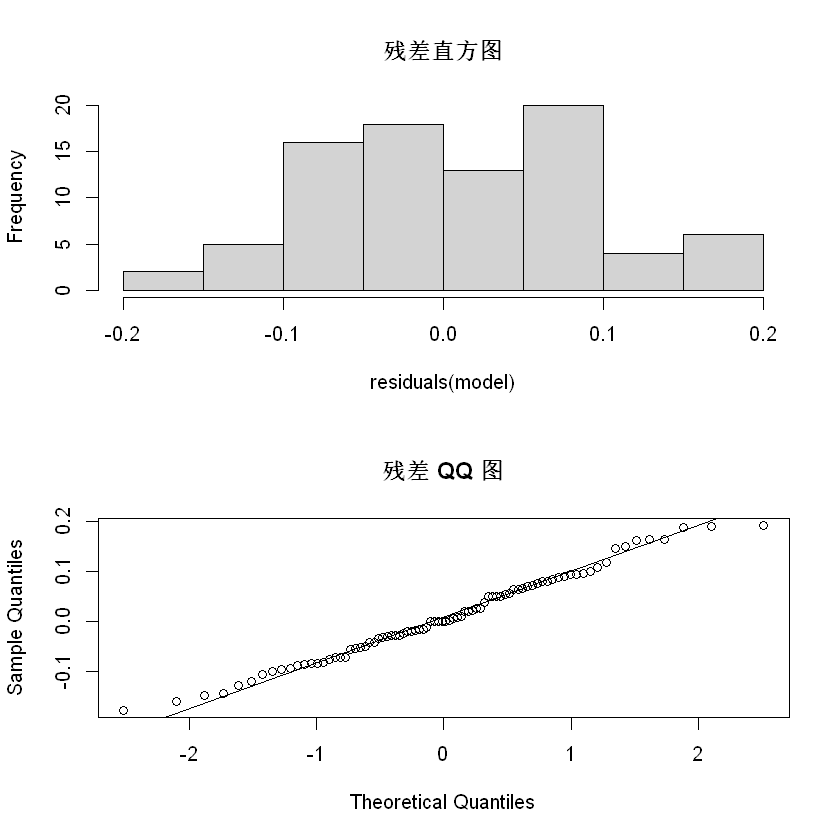

In [10]:
par(mfrow=c(2,1))

hist(residuals(model), main='残差直方图')
qqnorm(residuals(model), main='残差 QQ 图')
qqline(residuals(model))

In [11]:
shapiro.test(residuals(model))


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.98583, p-value = 0.489


各种检验都表明残差正常。

#### (h) 
计算并画出序列未来两年的预测值，要求给出预测极限。  

$\text{Solution.}$

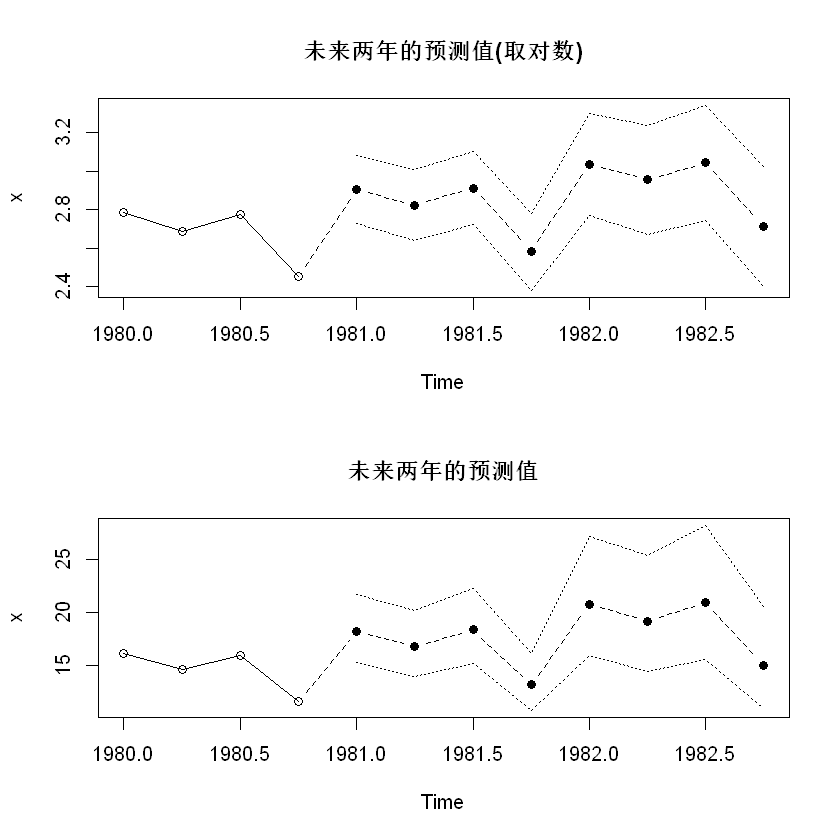

In [12]:
par(mfrow = c(2,1))

plot(model, 
     n1=c(1980,1), 
     n.ahead=2*4, 
     pch=19, 
     main='未来两年的预测值(取对数)')

plot(model, 
     n1=c(1980,1),
     n.ahead=2*4,
     pch=19, 
     transform=exp, 
     main='未来两年的预测值')

预测情况展示如上。  

预测点为黑色实心点，预测极限为黑色虚线。